### **TensorFlow / Keras**

* 텐서플로우와 케라스는 ML 모델 개발하고 학습 시키는 데 도움이 되는 핵심 오픈소스 라이브러리
* 케라스는 사용자가 텐서플로우를 좀 더 쉽고 편하게 사용할 수 있게 해주는 high level API를 제공
* 텐서플로우 2.X에서 케라스를 딥러닝의 공식 API로 채택하였고 텐서플로우 내의 하나의 프레임워크로 개발되고 있음

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
print(tf.__version__)
print(keras.__version__)

2.7.0
2.7.0


### **1. Tensor**

Tensor는 multi-dimensional array를 나타내는 말로, Tensorflow의 기본 data type

In [3]:
hello = tf.constant([3, 3], dtype=tf.float32)
print(hello)

tf.Tensor([3. 3.], shape=(2,), dtype=float32)


In [4]:
hello = tf.constant('Hello World!')
print(hello)

tf.Tensor(b'Hello World!', shape=(), dtype=string)


In [5]:
# 상수형 tensor는 아래와 같이 만들 수 있음
# 값을 출력하면 tensor의 값과 함께, shape와 내부의 data type을 함께 볼 수 있음
# 버전 2부터 시작된 Eager Tensor로 가능
x = tf.constant([[1.0, 2.0],
                 [3.0, 4.0]])
print(x)
print(type(x)) # <class 'tensorflow.python.framework.ops.EagerTensor'>

tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
x_np = np.array([[1.0, 2.0],
                 [3.0, 4.0]])
x_list = [[1.0, 2.0], 
          [3.0, 4.0]]

print(type(x_np))
print(type(x_list))

<class 'numpy.ndarray'>
<class 'list'>


In [8]:
# numpy ndarray, python의 list를 tensor로 바꿀 수 있음
x_np = tf.convert_to_tensor(x_np)
x_list = tf.convert_to_tensor(x_list)

print(type(x_np))
print(type(x_list))

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [9]:
# tensor를 numpy ndarray로 바꿈
x.numpy()

array([[1., 2.],
       [3., 4.]], dtype=float32)

In [10]:
print(type(x.numpy()))

<class 'numpy.ndarray'>


In [11]:
# 텐서플로우의 함수(넘파이와 비슷)
a = tf.ones((2, 3))
print(a)

b = tf.zeros((2, 3)) # 0으로 초기화
print(b)

c = tf.fill((2, 2), 2) # 2로 초기화
print(c)

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[2 2]
 [2 2]], shape=(2, 2), dtype=int32)


In [12]:
# shape와 dtype이 복사
d = tf.zeros_like(c)
print(d)

e = tf.ones_like(c)
print(e)

tf.Tensor(
[[0 0]
 [0 0]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[1 1]
 [1 1]], shape=(2, 2), dtype=int32)


In [13]:
f = tf.eye(5)
print(f)

tf.Tensor(
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]], shape=(5, 5), dtype=float32)


In [14]:
g = tf.range(10)
print(g)

tf.Tensor([0 1 2 3 4 5 6 7 8 9], shape=(10,), dtype=int32)


In [15]:
h = tf.random.uniform((2, 2)) # np.rand, 균일한 랜덤값 추출
print(h)

i = tf.random.normal((2, 2)) # np.randn, 무작위로 랜덤값 추출
print(i)

tf.Tensor(
[[0.9347247  0.13478553]
 [0.20149767 0.6119572 ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[-0.8707555   0.17241955]
 [ 0.83608514 -0.636213  ]], shape=(2, 2), dtype=float32)


### **2. Tensor의 속성**

In [16]:
tensor = tf.random.normal((3, 4))

print(f"Shape : {tensor.shape}")
print(f"DataType : {tensor.dtype}")

Shape : (3, 4)
DataType : <dtype: 'float32'>


In [17]:
# 속성 변경
tensor = tf.reshape(tensor, (4, 3)) # 데이터 형식 바꾸기
tensor = tf.cast(tensor, tf.int32) # 데이터 타입 바꾸기

print(f"Shape : {tensor.shape}")
print(f"DataType : {tensor.dtype}")

Shape : (4, 3)
DataType : <dtype: 'int32'>


### **3. Variable**

* Variable은 변할 수 있는 상태를 저장하는데 사용되는 특별한 텐서
* 딥러닝에서는 학습해야 하는 가중치(weight, bias)들을 variable로 생성

In [18]:
tensor = tf.ones((3, 4))
print(tensor)

# tensor[0, 0] = 2 # 파이썬의 튜플과 비슷 -> 변화X

tf.Tensor(
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]], shape=(3, 4), dtype=float32)


In [19]:
# variable 만들기, 값 변경
variable = tf.Variable(tensor)
print(variable)

variable[0, 0].assign(2) # assign으로 값을 바꿀 수 있음
print(variable)

<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32, numpy=
array([[2., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>


In [20]:
initial_value = tf.random.normal(shape=(2, 2))
weight = tf.Variable(initial_value)
print(weight)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-0.12557739, -1.3551165 ],
       [-0.90132755, -1.8155203 ]], dtype=float32)>


In [21]:
# variable은 ".assign(value)", ".assign_add(increment)", ".assign_sub(decrement)"와 같은 메소드를 사용해서 variable의 값을 갱신
new_value = tf.random.normal(shape=(2, 2))
print(new_value)
weight.assign(new_value) # new_value값을 weight값으로 변경
print(weight)

added_value = tf.ones(shape =(2, 2))
weight.assign_sub(added_value) # weight에 added_value값을 뺌
print(weight)

tf.Tensor(
[[-0.8417976   0.73951155]
 [ 0.17583217 -0.47339478]], shape=(2, 2), dtype=float32)
<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-0.8417976 ,  0.73951155],
       [ 0.17583217, -0.47339478]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-1.8417976 , -0.26048845],
       [-0.82416785, -1.4733948 ]], dtype=float32)>


### **4. Indexing과 Slicing**

In [22]:
a = tf.range(1, 13)
print(a)

a = tf.reshape(a, (3, 4)) # 3행 4열 행렬
print(a)

tf.Tensor([ 1  2  3  4  5  6  7  8  9 10 11 12], shape=(12,), dtype=int32)
tf.Tensor(
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]], shape=(3, 4), dtype=int32)


In [23]:
# indexing -> 인덱싱을 하게되면 차원이 감소하게 됨
print(a[1]) # 두번째 행 출력
print(a[0, -1]) # 4 출력

tf.Tensor([5 6 7 8], shape=(4,), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)


In [24]:
# slicing -> 슬라이싱은 차원이 유지됨
print(a[1 : -1]) # 두번째 행
print(a[:2, 2:]) # 3, 4, 7, 8 출력

tf.Tensor([[5 6 7 8]], shape=(1, 4), dtype=int32)
tf.Tensor(
[[3 4]
 [7 8]], shape=(2, 2), dtype=int32)


### **5. Transpose(차원 바꾸기)**

In [25]:
a = tf.range(16)
print(a)

a = tf.reshape(a, (2, 2, -1)) # 3차원 : 2면 2행 4열, -1은 자동으로 만들라는 뜻
print(a)

tf.Tensor([ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15], shape=(16,), dtype=int32)
tf.Tensor(
[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]], shape=(2, 2, 4), dtype=int32)


In [26]:
b = tf.transpose(a, (2, 0, 1)) # 2 : 열, 1, 행, 0 : 면 => (4, 2, 2)인 3차원
print(b)

tf.Tensor(
[[[ 0  4]
  [ 8 12]]

 [[ 1  5]
  [ 9 13]]

 [[ 2  6]
  [10 14]]

 [[ 3  7]
  [11 15]]], shape=(4, 2, 2), dtype=int32)


### **6.Tensor 연산**

In [27]:
x = tf.constant([[1, 2], [3, 4]], dtype=tf.float32)
y = tf.constant([[5, 6], [7, 8]], dtype=tf.float32)

print(x)
print(y)

tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[5. 6.]
 [7. 8.]], shape=(2, 2), dtype=float32)


In [28]:
# 함수 사용
print(tf.add(x, y)) # 덧셈 :각 요소들의 덧셈
print(tf.subtract(x, y)) # 뺄셈
print(tf.multiply(x, y)) # 곱셈
print(tf.divide(x, y)) # 나눗셈
print(tf.matmul(x, y)) # 행렬의 곱
print('*' * 50)

# 수식으로 표현
print(x + y)
print(x - y)
print(x * y)
print(x / y)
print(x @ y)

tf.Tensor(
[[ 6.  8.]
 [10. 12.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[-4. -4.]
 [-4. -4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 5. 12.]
 [21. 32.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[0.2        0.33333334]
 [0.42857143 0.5       ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[19. 22.]
 [43. 50.]], shape=(2, 2), dtype=float32)
**************************************************
tf.Tensor(
[[ 6.  8.]
 [10. 12.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[-4. -4.]
 [-4. -4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 5. 12.]
 [21. 32.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[0.2        0.33333334]
 [0.42857143 0.5       ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[19. 22.]
 [43. 50.]], shape=(2, 2), dtype=float32)


In [29]:
z = tf.range(1, 11)
print(z)

z = tf.reshape(z, (2, 5))
print(z)

tf.Tensor([ 1  2  3  4  5  6  7  8  9 10], shape=(10,), dtype=int32)
tf.Tensor(
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]], shape=(2, 5), dtype=int32)


In [30]:
print(tf.reduce_sum(z)) # 모든 요소를 더해줌

tf.Tensor(55, shape=(), dtype=int32)


In [31]:
sum1 = tf.reduce_sum(z, axis=0) # 각 열의 합
print(sum1)

sum2 = tf.reduce_sum(z, axis=1) # 각 행의 합
print(sum2)

sum3 = tf.reduce_sum(z, axis=-1) # -1 : 차원의 마지막
print(sum3)

tf.Tensor([ 7  9 11 13 15], shape=(5,), dtype=int32)
tf.Tensor([15 40], shape=(2,), dtype=int32)
tf.Tensor([15 40], shape=(2,), dtype=int32)


In [32]:
concat = tf.concat([z, z], axis=0) # 열(아래로)끼리 묶음
print(concat)

concat = tf.concat([z, z], axis=-1) # 행(옆으로)끼리 묶음
print(concat)

tf.Tensor(
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [ 1  2  3  4  5]
 [ 6  7  8  9 10]], shape=(4, 5), dtype=int32)
tf.Tensor(
[[ 1  2  3  4  5  1  2  3  4  5]
 [ 6  7  8  9 10  6  7  8  9 10]], shape=(2, 10), dtype=int32)


### **7. TensorFlow / Keras 예제**

In [33]:
# MNIST 데이터셋 다운로드
mnist = keras.datasets.mnist # 손글씨 숫자 이미지 데이터
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # 픽셀을 0부터 1사이의 값으로 바꿈

11501568/11490434 [==============================] - 0s 0us/step


In [34]:
# Model 생성, 컴파일
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) # 해석

In [36]:
# Training
model.fit(x_train, y_train, epochs=10)
model.evaluate(x_test, y_test) # 학습이 잘 되었는지 확인

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2952 - accuracy: 0.9140
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1419 - accuracy: 0.9578
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1043 - accuracy: 0.9686
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0868 - accuracy: 0.9737
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0747 - accuracy: 0.9762
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0657 - accuracy: 0.9787
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0569 - accuracy: 0.9816
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0518 - accuracy: 0.9832
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0469 - accuracy: 0.9843
Epoch 10/10
313/313 [==============================] - 1s 1ms/step - loss: 0.0695 

[0.06953077018260956, 0.9793999791145325]

In [37]:
idx = np.random.randint(len(x_train)) # 이미지 데이터에서 랜덤하게 1개 뽑기
image = x_train[idx]

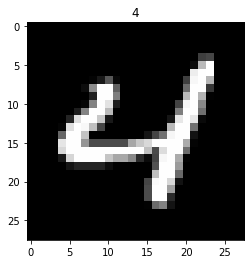

In [38]:
plt.imshow(image, cmap='gray')
plt.title(y_train[idx])
plt.show()

In [43]:
# 파일 업로드
import os
from PIL import Image
from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys() :
  print('업로드 파일 이름 : {name}, 용량 : {length} bytes'.format(name = fn, length = len(uploaded[fn])))

Saving image.png to image.png
업로드 파일 이름 : image.png, 용량 : 729 bytes


/content/image.png


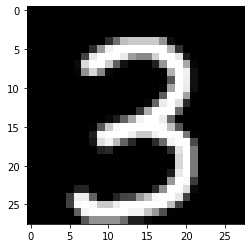

In [47]:
# image file의 경로 설정
cur_dir = os.getcwd()
image_path = os.path.join(cur_dir, 'image.png')
print(image_path)
cur_img = Image.open(image_path)

# 28X28 resize
cur_img = cur_img.resize((28, 28))
image = np.asarray(cur_img)

# color image일 경우 RGB 평균값으로 gray scale로 변경
try :
  image = np.mean(image, axis=2)
except :
  pass

# upload한 image는 흰 배경에 검은 글씨로 되어 있으므로 MNIST data와 같이 검은 배경 흰 글씨로 변경
image = np.abs(255-image) # 반전

# MNIS와 동일하게 data preprocessing(255로 나눠줌)
image = image.astype(np.float32) / 255

# 화면에 출력
plt.imshow(image, cmap='gray')
plt.show()

In [48]:
# shape을 변경하여 학습된 model에 넣고 결과 확인
image = np.reshape(image, (1, 28, 28)) # 1장의 이미지, 픽셀 사이즈
print(model.predict(image))

print('model이 예측한 값은 {} 입니다.'.format(np.argmax(model.predict(image), -1)))

[[2.2440075e-27 4.5898237e-23 9.5401617e-11 1.0000000e+00 2.4376026e-28
  2.0540900e-12 1.5188018e-25 2.6712829e-12 1.8856518e-15 6.7862980e-15]]
model이 예측한 값은 [3] 입니다.
